## **Churn Prediction**

Purpose:
This case has the purpose of predicting who customers will leave the company based on the company's dataset and the behavior of others customers that left of being customers in the past.

### **Introduction**

Link and dictionary of data: [Telco Database](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
#Import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV

### **Exploratory Analysis**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Firstly is great idea check the type of data to know if in the dataset has field with wrong type.

Well, below we can see that in the field "TotalCharges" (that in the table above the data is numeric) is as "object", but the correct one is "float".

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It was identified that the field "TotalCharges" had space blank in some values. Values that could be as NaN were with space blank and for the python space blank is a value too. So We'll need to convert for NaN before to convert for float.

In [4]:
#Converting to NaN and converting to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan ).astype(float)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now, we can see that the dataset has 11 values missing in the "TotalCharges". This is an important point because it will be necessary to do something before of apply models further.

In [5]:
 #Check if there are some missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Other important part is verifying the statistic from numeric fields. This step helps us identify outliers for example. So, we can see below that our dataset has, maybe, fields for standarding (MonthlyCharges and TotalCharges).

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now, let go to start to understand the data and build some visualizations. Let's go to start by the target field, Churn.

The purpose of this visualization is to identify if the dataset is unbalanced. As recommended by the literature before applying the models, will be necessary balanced this data to not bias the model.

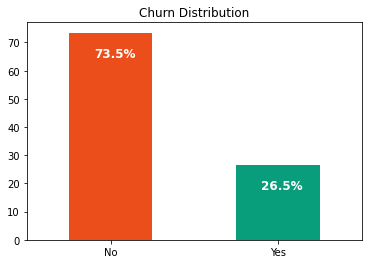

In [7]:
colors = ['#EB4E1A','#099E7B']
churn_chart = (df['Churn'].value_counts()*100/len(df)).plot(kind='bar', color=colors, rot=0)
churn_chart.set_title('Churn Distribution')

totals_churn = []

for i in churn_chart.patches:
    totals_churn.append(i.get_width())

total_churn = sum(totals_churn)

for i in churn_chart.patches:
    churn_chart.text(i.get_x()+0.15, i.get_height()-8.5,
                     str(round((i.get_height()/total_churn),1))+'%',
                     fontsize=12,
                     color='white',
                     weight='bold')


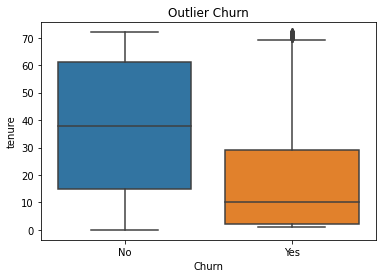

In [8]:
ax = sns.boxplot(data=df, x='Churn', y='tenure')
ax.set_title('Outlier Churn')

plt.show()

The distribution of data is important too because it helps us understand more about the dataset.

Below, we can see 3 of the most important variable from the dataset (Tenure, MonthlyCharges and TotalCharges). 

- The first, Tenure, the chart shows us that most customers are distributed in the firsts months, before one year, and after two years, 70 months.

- The same insight repeats in the chart of MonthlyCharges. It shows us that the value monthly is more distributed in the first months.

- TotalCharges too, the amount is concentrated in the first months.

That says a lot of things. For example, might be that the customers are leaving before one year and stay in the company just for a few months.

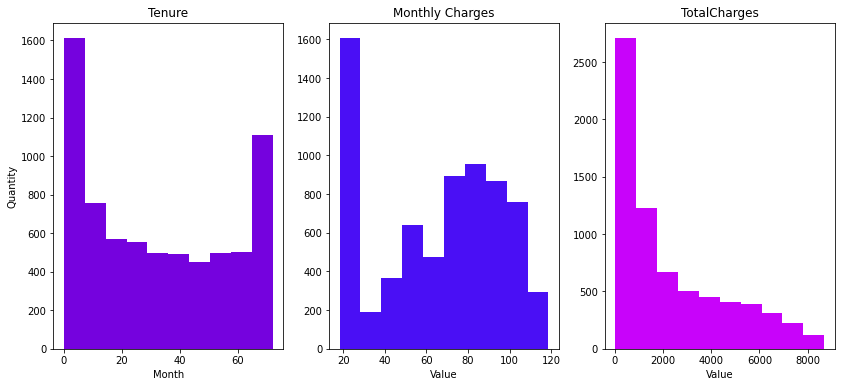

In [9]:
fig, ax = plt.subplots(figsize=(14,6),ncols=3)

ax[0].hist(data=df,x='tenure', bins=10, color='#7502DE')
ax[0].set_title('Tenure', size=12)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Quantity')

ax[1].hist(data=df, x='MonthlyCharges',bins=10, color='#4A0FF5')
ax[1].set_title('Monthly Charges', size=12)
ax[1].set_xlabel('Value')

ax[2].hist(data=df, x='TotalCharges', bins=10, color='#C803FA')
ax[2].set_title('TotalCharges',size=12)
ax[2].set_xlabel('Value')

plt.show()

To try to confirm this hypothesis, let's go to visualize the churn by kind of contract.
And below we can see that Churn rate in contract Month-to-Month is biggest than One-Year and Two-Year.

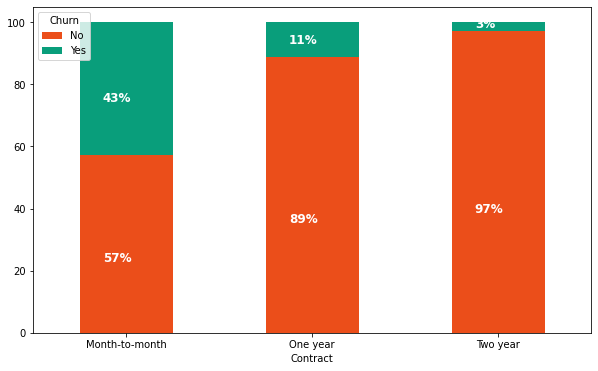

In [10]:
colors = ['#EB4E1A','#099E7B']
churn_contract = df.groupby(['Contract','Churn']).size().unstack()
contract_chart = (churn_contract.T*100/churn_contract.T.sum()).T.plot(
    kind='bar',
    color=colors,
    stacked=True,
    figsize=(10,6),
    rot=0
)

contract_totals = []
for i in contract_chart.patches:
    width, height = i.get_width(), i.get_height()
    x,y = i.get_xy()
    contract_chart.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+0.4*height),
                            color='white',
                            size=12,
                            weight='bold')

Visualizing the distribution of customers by tenure and kind of contract.
Well, to additional the last insight, let's go to visualize the distribution of customers to each contract.

- In fact, the most of customers that have the contract Month-to-Month are more concentrated in the first months.

- The customers with a contract of Two-year, mostly stay longer.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


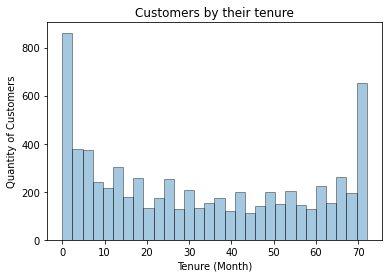

In [11]:
customer_tenure = sns.distplot(df['tenure'], hist=True, 
                                kde=False,
                                hist_kws={'edgecolor':'black'},
                                bins=30);

customer_tenure.set_title('Customers by their tenure')
customer_tenure.set_ylabel('Quantity of Customers')
customer_tenure.set_xlabel('Tenure (Month)');


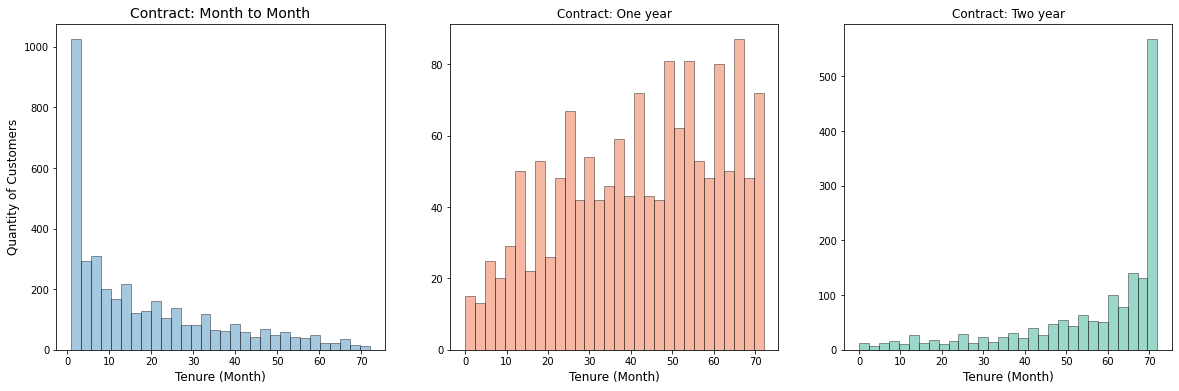

In [12]:
fig, (ax1, ax2, ax3) =plt.subplots(ncols=3, figsize=(20,6));

ax = sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                  hist=True,
                  bins=30,
                  hist_kws={'edgecolor':'black'},
                  kde=False,
                  ax=ax1
                  );
ax1.set_title('Contract: Month to Month', size=14);
ax1.set_ylabel('Quantity of Customers', size=12);
ax1.set_xlabel('Tenure (Month)', size=12);

ax = sns.distplot(df[df['Contract'] == 'One year']['tenure'],
                     bins=30,
                     kde=False,
                     hist=True,
                     hist_kws = {'edgecolor':'black'},
                    color= '#EB4E1A',
                    ax=ax2);
ax2.set_title('Contract: One year');
ax2.set_xlabel('Tenure (Month)', size=12);

ax = sns.distplot(df[df['Contract'] == 'Two year']['tenure'],
                  bins=30,
                  kde=False,
                  hist=True,
                  hist_kws = {'edgecolor':'black'},
                  ax=ax3,
                  color='#099E7B');
ax3.set_title('Contract: Two year');
ax3.set_xlabel('Tenure (Month)', size=12);

display()

Checking the distribution of customers in the dataset and by Churn.
Purpose: Identify if the company has more women or men and which gender has left frequently.

- Both, men and women have the same proportion in the dataset and both have the same rate of Churn.

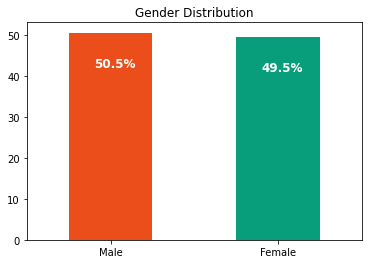

In [13]:
colors = ['#EB4E1A','#099E7B']
gender_chart = (df['gender'].value_counts()*100/len(df)).plot(kind='bar', color=colors, stacked=True, rot=0)
gender_chart.set_title('Gender Distribution')

totals =[]
for i in gender_chart.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in gender_chart.patches:
  gender_chart.text(i.get_x()+.15, i.get_height()-8.5, 
          str(round((i.get_height()/total), 1))+'%', 
          fontsize=12, 
          color='white', 
          weight='bold')

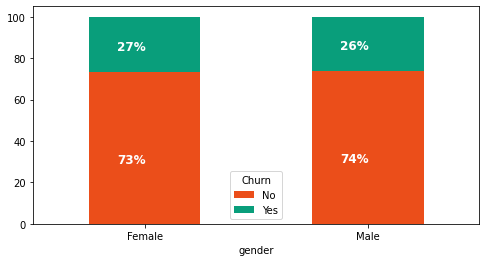

In [14]:
colors = ['#EB4E1A','#099E7B']
churn_contract = df.groupby(['gender','Churn']).size().unstack()
contract_chart = (churn_contract.T*100/churn_contract.T.sum()).T.plot(
    kind='bar',
    color=colors,
    stacked=True,
    figsize=(8,4),
    rot=0
)

contract_totals = []
for i in contract_chart.patches:
    width, height = i.get_width(), i.get_height()
    x,y = i.get_xy()
    contract_chart.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+0.4*height),
                            color='white',
                            size=12,
                            weight='bold')

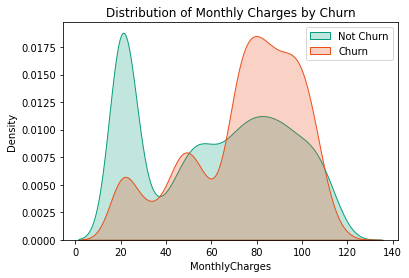

In [15]:
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'No')],
                 color='#099E7B', shade=True)
ax = sns.kdeplot(df['MonthlyCharges'][(df['Churn'] == 'Yes')],
                 color='#EB4E1A', shade=True)
ax.legend(['Not Churn','Churn']);
ax.set_title('Distribution of Monthly Charges by Churn');

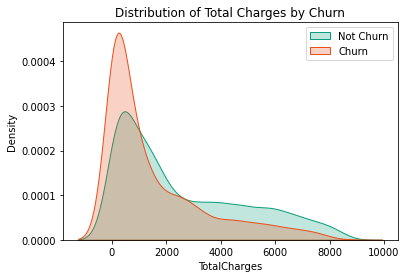

In [16]:
ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'No')],
                 shade=True,
                 color='#099E7B')

ax = sns.kdeplot(df['TotalCharges'][(df['Churn'] == 'Yes')],
                 shade=True,
                 color='#EB4E1A')

ax.legend(['Not Churn','Churn']);
ax.set_title('Distribution of Total Charges by Churn');

### **Preprocessing**

Step for prepar the dataset to apply the models.

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Fill missing data from field "TotalCharges" with median.

In [18]:
df['TotalCharges'].replace(np.nan,df['TotalCharges'].median(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The models below don't accept variables as strings, so will be necessary to transform the fields of type "string" to int or float.

In [19]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

cat_var = ['gender', 'Partner', 'Dependents', 
           'PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'Contract','PaperlessBilling','PaymentMethod','OnlineBackup','Churn']

for i in cat_var:
    df[i] = lb.fit_transform(df[i])

Here will be necessary to standardize the fields tenure, monthlyCharges and TotalCharges for they be in the same scale.

In [20]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

num_var = np.asarray(['tenure','MonthlyCharges','TotalCharges']).reshape(-1,1)

for i in num_var:
    df[i] = std_scale.fit_transform(df[i])

Step to split the dataset to train and test the model with data.

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

So, we can't forget of balanced the data to the models don't be biased.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


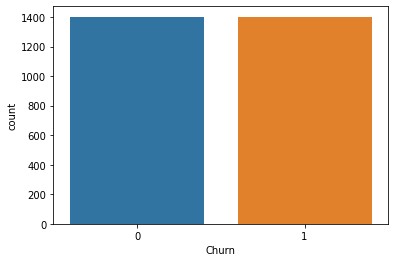

In [22]:
from imblearn.under_sampling import RandomUnderSampler

spl = RandomUnderSampler()
x_spl, y_spl = spl.fit_resample(X_train, y_train)

sns.countplot(y_spl)

plt.show()

Salving the data as pkl file.

In [23]:
import pickle

with open('Churn.pkl', 'wb') as f:
    pickle.dump([x_spl, y_spl, X_test,y_test], f)

And for the last step of this topic, I think it interesting to plot a matrix of correlation.

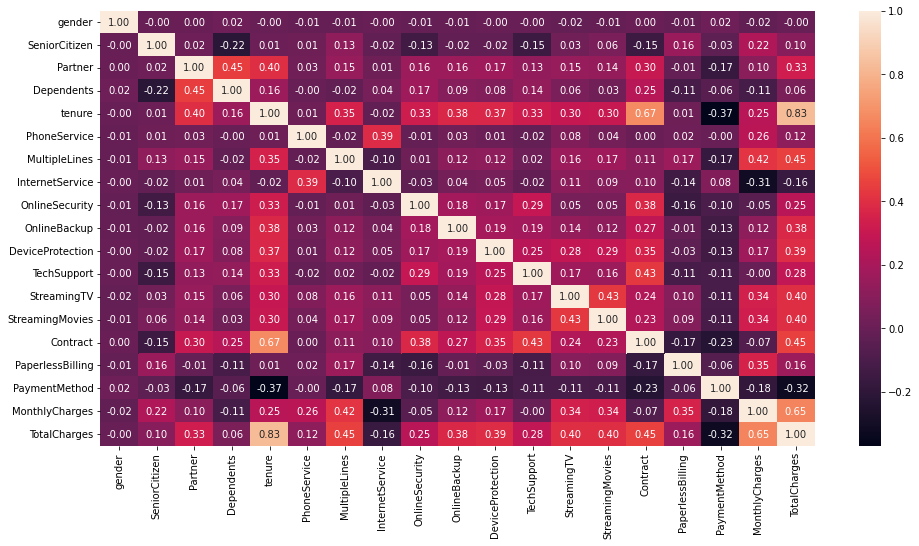

In [24]:
corr = X_train.corr()
corr_spl = pd.DataFrame(x_spl).corr()

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=corr, square=False, annot=True, fmt='.2f');

### **Models Apply**

In [25]:
with open('Churn.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [26]:
x_df = np.concatenate((x_train, x_test), axis=0)
y_df = np.concatenate((y_train, y_test), axis=0)

#### **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
#train the model
lg = LogisticRegression(random_state=1)
lg.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [29]:
#predict with train data
y_lg_pred = lg.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_lg_pred)

0.7490062464508802

##### **Paramters Configuration**

In [30]:
lr_paramter = {
    'tol':[0.0001, 0.00001, 0.000001],
    'C' : [1.0,1.5,2.0],
    'solver' : ['lbfgs', 'sag','saga']}

lr_gridsearch = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_paramter)
lr_gridsearch.fit(x_df, y_df)
best_lr_param = lr_gridsearch.best_params_
best_lr_result = lr_gridsearch.best_score_
print(best_lr_param)
print(best_lr_result)

{'C': 2.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.768893756845564


##### **Cross Validation**

In [43]:
resultLG = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    logisticReg = LogisticRegression(C=2.0, solver='lbfgs', tol=0.0001)
    scoreLG = cross_val_score(logisticReg, x_df, y_df, cv=kfold)
    resultLG.append(scoreLG.mean())

#### **Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_tree_predict = tree.predict(x_test)
accuracy_score(y_test, y_tree_predict)

0.6859738784781374

##### **Paramters Configuration**

In [33]:
dt_paramter = {
    'criterion':['gini','entropy'],
    'splitter' : ['best','random'],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1, 5, 10]
}

dt_gridsearch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_paramter)
dt_gridsearch.fit(x_df, y_df)
best_dt_param = dt_gridsearch.best_params_
best_dt_result = dt_gridsearch.best_score_
print(best_dt_param)
print(best_dt_result)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
0.7480832420591457


##### **Cross Validation**

In [40]:
from sklearn.model_selection import cross_val_score, KFold

In [42]:
resultDT = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    decisionTree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scoreDT = cross_val_score(decisionTree, x_df, y_df, cv=kfold)
    resultDT.append(scoreDT.mean())


#### **SVM**

In [34]:
from sklearn.svm import SVC

svm = SVC(random_state=1, kernel='rbf', C = 2.0)
svm.fit(x_train, y_train)

SVC(C=2.0, random_state=1)

In [35]:
svm_predict = svm.predict(x_test)
accuracy_score(y_test, svm_predict)

0.7427597955706985

##### **Paramters Configuration**

In [36]:
svm_paramter = {
    'tol':[0.001, 0.0001, 0.00001],
    'C' : [1.0,1.5,2.0],
    'kernel' : ['rbf', 'linear','poly', 'sigmoid']}

svm_gridsearch = GridSearchCV(estimator=SVC(), param_grid=svm_paramter)
svm_gridsearch.fit(x_df, y_df)
best_svm_param = svm_gridsearch.best_params_
best_svm_result = svm_gridsearch.best_score_
print(best_svm_param)
print(best_svm_result)

{'C': 1.0, 'kernel': 'linear', 'tol': 0.001}
0.7675794085432639


##### **Cross Validation**

In [44]:
resultSVM = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    svm = SVC(C=1.0, kernel='linear', tol=0.001)
    scoreSVM = cross_val_score(svm, x_df, y_df, cv=kfold)
    resultSVM.append(scoreSVM.mean())

#### **Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier

randomF = RandomForestClassifier(criterion='entropy', random_state=0,n_estimators=40)
randomF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [38]:
randomF_predict = randomF.predict(x_test)
accuracy_score(y_test, randomF_predict)

0.7495741056218058

##### **Paramters Configuration**

In [39]:
rf_paramter = {
    'criterion':['gini','entropy'],
    'n_estimators' : [10,40,100,150],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1, 5, 10]
}

rf_gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_paramter)
rf_gridsearch.fit(x_df, y_df)
best_rf_param = rf_gridsearch.best_params_
best_rf_result = rf_gridsearch.best_score_
print(best_rf_param)
print(best_rf_result)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 40}
0.7754654983570646


##### **Cross Validation**

In [45]:
resultRF = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    RandForest = RandomForestClassifier(criterion='entropy', min_samples_leaf= 10, min_samples_split= 2, n_estimators=40)
    scoreRF = cross_val_score(RandForest, x_df, y_df, cv=kfold)
    resultRF.append(scoreRF.mean())

### **Validation of Results**

In [46]:
result = pd.DataFrame({
    "Decision Tree":resultDT,
    "Logistic Regression":resultLG,
    "SVM":resultSVM,
    "Random Forest":resultSVM
})

result

,Decision Tree,Logistic Regression,SVM,Random Forest
0,0.679062,0.768017,0.765170,0.765170
1,0.697278,0.770421,0.767137,0.767137
2,0.678631,0.764509,0.764722,0.764722
3,0.685210,0.769118,0.765610,0.765610
4,0.685206,0.768899,0.766054,0.766054
5,0.684777,0.767370,0.765179,0.765179
6,0.683031,0.769328,0.766919,0.766919
7,0.694200,0.770871,0.768242,0.768242
8,0.692021,0.768016,0.768891,0.768891
9,0.685654,0.768893,0.765169,0.765169


In [47]:
result.describe()

,Decision Tree,Logistic Regression,SVM,Random Forest
count,30.000000,30.000000,30.000000,30.000000
mean,0.685746,0.768790,0.766687,0.766687
std,0.004866,0.001289,0.001690,0.001690
min,0.678631,0.764509,0.763838,0.763838
25%,0.683014,0.768072,0.765228,0.765228
50%,0.684889,0.768899,0.766814,0.766814
75%,0.686796,0.769654,0.767685,0.767685
max,0.697278,0.770871,0.770428,0.770428


### **Hypothesis Test**

In [49]:
from scipy.stats import f_oneway

_,p = f_oneway(resultDT, resultLG, resultRF, resultSVM)
p

2.472494160720135e-128

In [50]:
alpha = 0.05

if p <=alpha:
    print("Hypothesis null was rejected. The data is diffirent")
else:
    print("Hypothesis alternative was rejected. Results are equals")

Hypothesis null was rejected. The data is diffirent


### **Tukey Result**

In [54]:
resultAll = pd.DataFrame({
    'accuracy': np.concatenate([resultDT, resultLG, resultRF, resultSVM]),
    'algorithm': ['Decision Tree', 'Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree','Decision Tree',
                  'Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression',
                  'Random Forest', 'Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest',
                  'SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM','SVM']})
resultAll

,accuracy,algorithm
0,0.679062,Decision Tree
1,0.697278,Decision Tree
2,0.678631,Decision Tree
3,0.685210,Decision Tree
4,0.685206,Decision Tree
...,...,...
115,0.765389,SVM
116,0.766703,SVM
117,0.767791,SVM
118,0.767369,SVM


In [55]:
from statsmodels.stats.multicomp import MultiComparison

CompAlgorithm = MultiComparison(resultAll['accuracy'], resultAll['algorithm'])
TestComp = CompAlgorithm.tukeyhsd()
print(TestComp)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------------------
      Decision Tree Logistic Regression    0.083 0.001  0.0811   0.085   True
      Decision Tree       Random Forest   0.0867 0.001  0.0847  0.0886   True
      Decision Tree                 SVM   0.0809 0.001   0.079  0.0829   True
Logistic Regression       Random Forest   0.0036 0.001  0.0017  0.0055   True
Logistic Regression                 SVM  -0.0021 0.028  -0.004 -0.0002   True
      Random Forest                 SVM  -0.0057 0.001 -0.0076 -0.0038   True
-----------------------------------------------------------------------------


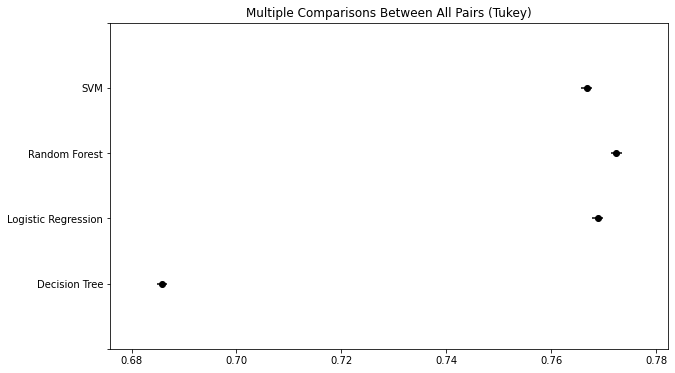

In [56]:
TestComp.plot_simultaneous();